<h1>Linear Regression in One-Dimension</h1>
    <p>These notes are far from original. They are a collection of many educational videos, common knowledge and lecture notes. Especially the lectures of Andrew Ng are the greates reference I am using, and the lectures I recommend for anyone to use. The dataset we are using is that of Andrew Ng's course on coursera.</p>
        <h2>Model Representation</h2>
    <p>In a regression problem we are going to assume that we are presented with clean data. For simplicity and in order to develop intuition for the future models, we will be assuming a one dimensional model. Our data will be about housing prices. And our data will be the price of an apartment given the square meter area of the apartment. The number of data we have in this case will be called <b>training examples</b> $m$. The square meter value will be called <b>features</b> $x$. The price will be called <b>target</b> $y$.
    $$(x^{(i)},y^{(i)})$$ will be used to represent $i$th target and feature.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


data = pd.read_csv('ex1data1.txt') 
X = data.iloc[:,0]  
y = data.iloc[:,1] 
m = X.size 
data.head() 
X = X[:,np.newaxis]
y = y[:,np.newaxis]



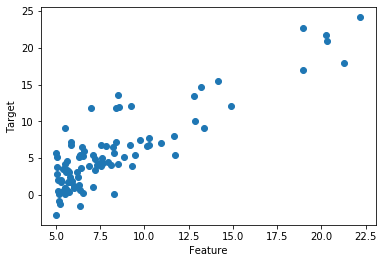

In [2]:
plt.scatter(X, y)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.savefig("image_linear_regression_one_dimension_scatter.png")

<p>This is the scatter graph of a sample data that is good for learning linear regression. For this data, we will come up with an <b>hypothesis</b>. This hypothesis will be in this case an equation of a line! Simply we want it to fit this data as much as possible. Then we need a way to measure how fit it is. Let $h(x)$ be our hypothesis. Since it needs to be a line, it will have the form: 
    $$ h(x) = \theta_0 + \theta_1 x$$ where $\theta_i$'s are what we call <b>parameters</b>.In the housing prices case, our parameter is the square area of the apartment. </p>
    <h3>Cost Function</h3>
    <p>As we said we want to find out how fit our hypothesis is. Imagine our hypothesis is a line going through any direction of this graph. One way to do this is to look at the distance between each data point and the corresponding point of our hypothesis line. For example if at $x=30$, our data has a value $y=39$, and at the same $x$ value our hypothesis has $y=31$, then we will consider the distance between the two $y$ values. But let us not work with absolute values, so we can simply work with square of the distance instead.</p>
    <p>Now, imagine doing this for each data point. In order to understand how fit our hypothesis is, the total of the distances will have to be as small as possible. So we simply add all these distances' squares. And this will be how we measure how fit our hypothesis is.</p>
    <p>This is the idea of something very important in not only machine learning but also statistics too. It is called the <b>cost function</b>. Let us now write down mathematically what we meant above. First we substract one from the other,
    $$h(x^{(i)}-y^{(i)})$$ and then we take the square so that we have a clean positive value,
    $$h(x^{(i)}-y^{(i)})^2$$ Now we do this for all the data points and adding them all we will get,
    $$\sum_{i=1}^{m} h(x^{(i)}-y^{(i)})^2$$ One final touch is that conventionally for mathematical elegance we will add an unimportant factor of $\frac{1}{2m}$ in the beginning. Thus the final version of the cost function is:
    $$ J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m} h(x^{(i)}-y^{(i)})^2$$</p>
    <p>Let us not forget the big picture. <b>We want to minimize the cost function.</b> Note that the value $m$ is the number of total data points therefore it is constant. The values of $y^{(i)}$ is the data points therefore it is not a parameter. So what needs to be done is to find a pair of $(\theta_0,\theta_1)$ that will minimize this function. Because these are the only values that are not known.</p>

<h3>Gradient Descent</h3>
<p>In order to numerically minimize the cost function, we will use the method of gradient descent. Basic idea is to start at one point, change it slightly to the decreasing direction; and check if it is minimized. The formula needed is the following formula repeated until we converge to the minimum: 
    $$ \theta_i := \theta_i - \alpha \frac{\partial}{\partial \theta_{i}}J(\theta_0, \theta_1) $$ where $i=0,1$. This formula assures that when we update, it will go into the direction of the minimum. We need to be careful about the update. We need simultenious update of $\theta_0$ and $\theta_1$. The way to do that is the following:
    $$ temp0 = \theta_0 - \alpha \frac{\partial}{\partial \theta_0}J(\theta_0,\theta_1)$$
    $$ temp1 = \theta_1 - \alpha \frac{\partial}{\partial \theta_1}J(\theta_0,\theta_1)$$
    $$ \theta_0 = temp0$$
    $$ \theta_1 = temp1$$</p>
    <p>The important point about this algorithm is: 
        <ul><li>If $\alpha$ is too small then the algorithm will too much time to execute.</li>
            <li>If $\alpha$ is too big then it will overjump the minimum. It will never converge.</li>
            <li>If the initial point of the gradient descent is in fact the minimum, then we will not observe an update.</li>
            <li>As the derivative of the cost function will approach to zero, we don't need to update the coefficient $\alpha$. Nonetheless, we will take smaller steps overtime.</li></ul></p>

<h3>The Explicit Calculation of the Gradient Descent</h3>
<p>The important part that needs explicit calculation is the derivative part. Let us take the derivative of the cost function:
    $$ \frac{\partial}{\partial \theta_i}J(\theta_0,\theta_1) = \frac{\partial}{\partial \theta_i} \big[ \frac{1}{2m} \sum_{j=1}^{m} (h(x^{(j)}) - y^{(j)})^2 \big]$$ For $i=0$ we have:
    $$ \frac{\partial J}{\partial \theta_0} = \frac{1}{2m} 2 \big( \sum_{j=1}^{m} (\theta_0 + \theta_1 x^{(i)} - y^{(i)}) \big)$$ For $i=1$ we have:
    $$ \frac{\partial J}{\partial \theta_1} = \frac{1}{2m} 2 \big( \sum_{j=1}^{m} (\theta_0 + \theta_1 x^{(i)} -y^{(i)})x^{(i)} \big)$$ More compactly we will have:
    $$\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{j=1}^{m} (h(x^{(i)})-y^{(i)})$$
    $$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{j=1}^{m} (h(x^{(i)})-y^{(i)})x^{(i)}$$</p>
    <p>Some important remarks are:
        <ul><li>For linear regression, $J$ will always be convex therefore we don't need to worry about finding the maximum instead of minimum.</li>
            <li>For other types of cost functions, we always need to check the convexivity first. </li>
            <li>This is spesifically called the <b>batch gradient descent</b> as we are at each step, we are using the whole data.</li></ul></p>

In [3]:

alpha = 0.01

def h(theta_0,theta_1,X):
    return theta_0 + theta_1 * X

def dJ(theta_0,theta_1,X,y):
    dJ0 = np.sum(h(theta_0,theta_1,X)-y)/m
    dJ1 = np.sum(np.multiply(h(theta_0,theta_1,X)-y,X))/m
    return np.array([dJ0,dJ1])

In [4]:
def gradient_descent(theta_0,theta_1,X,y,alpha):
    iterations = 1500
    for a in range(iterations):
        der_J = dJ(theta_0,theta_1,X,y)
       
        temp0 = theta_0 - alpha * der_J[0]
        temp1 = theta_1 - alpha * der_J[1]
        theta_0 = temp0
        theta_1 = temp1
 
    return np.array([theta_0, theta_1])

In [5]:
theta = gradient_descent(4,4,X,y,alpha)
print(theta)

[-3.68964191  1.16127857]


<h3>Plotting the Result</h3>
<p>Now a few important points. We can observe that if we are starting with a "bad" initial conditions, we will have to iterate more. This does not really explain how serious this actually is. Assume that we know that we expect something similar to the $h(x)=x$ line. Now if we start with the initial conditions close to that we iterate $100$ or $1000$ times and we will converge to the correct values. If we randomly start at for instance $\theta_0 = 5, \theta_1 = 1$, then it takes $100.000$ iterations or more, to get to the correct values. Now we see how fit our result actually is:</p>

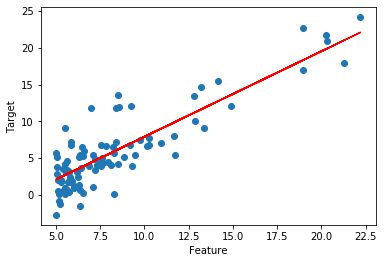

In [6]:
plt.scatter(X, y)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.plot(X, h(theta[0],theta[1],X),color='r')
plt.savefig("image_linear_regression_one_dimension.png")
plt.show()

<p>Here we can see that the direct implementation of the formulas derived gives the expected result.</p>

<h2>scikit-learn Solution of the Same Problem</h2>

In [7]:
regressor = LinearRegression()  
regressor.fit(X, y)
print(regressor.intercept_)
print(regressor.coef_)


[-4.21150401]
[[1.21354725]]


<p>As you can see the same result can be found on scikit-learn by just 2 lines of code. This is why the machine learning libraries will become extremely handy and in reality we will not be implementing the algorithms when trying to solve a problem.</p>